In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
# Загрузка и предобработка данных
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразование изображений в тензоры
    transforms.Normalize((0.5,), (0.5,))  # Нормализация данных
])

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:03<00:00, 8035631.65it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138882.37it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 497434.68it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1923416.80it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# Определение архитектуры модели LeNet5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Conv1 (1 канал -> 6 каналов)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Conv2 (6 каналов -> 16 каналов)
        self.fc1 = nn.Linear(16*4*4, 120)  # Полносвязный слой (flatten 16*4*4 -> 120)
        self.fc2 = nn.Linear(120, 84)  # Полносвязный слой (120 -> 84)
        self.fc3 = nn.Linear(84, 10)  # Выходной слой (84 -> 10 классов)

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Conv1 + ReLU
        x = torch.max_pool2d(x, 2)  # Max Pooling 2x2
        x = torch.relu(self.conv2(x))  # Conv2 + ReLU
        x = torch.max_pool2d(x, 2)  # Max Pooling 2x2
        x = x.view(-1, 16*4*4)  # Flattening
        x = torch.relu(self.fc1(x))  # FC1 + ReLU
        x = torch.relu(self.fc2(x))  # FC2 + ReLU
        x = self.fc3(x)  # Выходной слой (без активации)
        return x

In [6]:
# Инициализация модели, функции потерь и оптимизатора
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Функция обучения
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()  # Перевод модели в режим обучения
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Обнуление градиентов
            optimizer.zero_grad()

            # Прямой проход
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Обратный проход и оптимизация
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

In [8]:
# Функция оценки модели
def evaluate_model(model, test_loader):
    model.eval()  # Перевод модели в режим оценки
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total:.2f}%")

# Обучение и оценка модели
train_model(model, train_loader, criterion, optimizer, epochs=10)
evaluate_model(model, test_loader)

Epoch [1/10], Loss: 0.6273
Epoch [2/10], Loss: 0.4083
Epoch [3/10], Loss: 0.3535
Epoch [4/10], Loss: 0.3197
Epoch [5/10], Loss: 0.2991
Epoch [6/10], Loss: 0.2794
Epoch [7/10], Loss: 0.2652
Epoch [8/10], Loss: 0.2522
Epoch [9/10], Loss: 0.2403
Epoch [10/10], Loss: 0.2283
Accuracy: 89.14%


Представленный выше код выполняет только лишь базовую загрузку и настройку датасета. Он включал в себя: загрузку данных для обучения и тестирования, применение базовых преобразований изображений, подготовку данных для подачи в модель.

После того, как данные были загружены и обработаны, модель была обучена на протяжении 10 эпох.  

*Поянение результатов обучения.*

Epoch [x/y], Loss: z: Этот формат означает, что на x эпохе обучения (из y запланированных эпох) функция потерь (Loss) модели составила z. Функция потерь измеряет, насколько предсказания модели отклоняются от истинных значений. Чем ниже значение Loss, тем точнее модель делает предсказания. Видно, что потери уменьшаются по мере прохождения эпох, что указывает на улучшение точности модели. Accuracy: 89.14%: Это итоговая точность модели на тестовой выборке после завершения всех эпох обучения. Точность показывает процент правильных предсказаний модели относительно общего числа предсказаний. В данном случае модель смогла верно предсказать 89.14% классов на тестовом наборе данных.

Теперь, необходимо перейти к полной настройке, т.к. в предыдущей версии отсутствовали некоторые шаги, такие как: формирование датасетов для обучения и тестирования, подключение библиотек для визуализации, вывод изображений в тренировочной выборке, визуализация целевых меток.

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [12]:
# Загрузка данных с трансформацией в тензоры и нормализацией
transform = transforms.Compose([transforms.ToTensor()])

In [14]:
# Загружаем тренировочные и тестовые данные
FashionMNIST_train = datasets.FashionMNIST('./', download=True, train=True, transform=transform)
FashionMNIST_test = datasets.FashionMNIST('./', download=True, train=False, transform=transform)

100%|██████████| 26421880/26421880 [00:04<00:00, 6435345.39it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 133370.05it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 508825.70it/s] 


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14452661.98it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [15]:
# Формируем датасеты для обучения, тестирования и целевые переменные
X_train = FashionMNIST_train.data
y_train = FashionMNIST_train.targets
X_test = FashionMNIST_test.data
y_test = FashionMNIST_test.targets

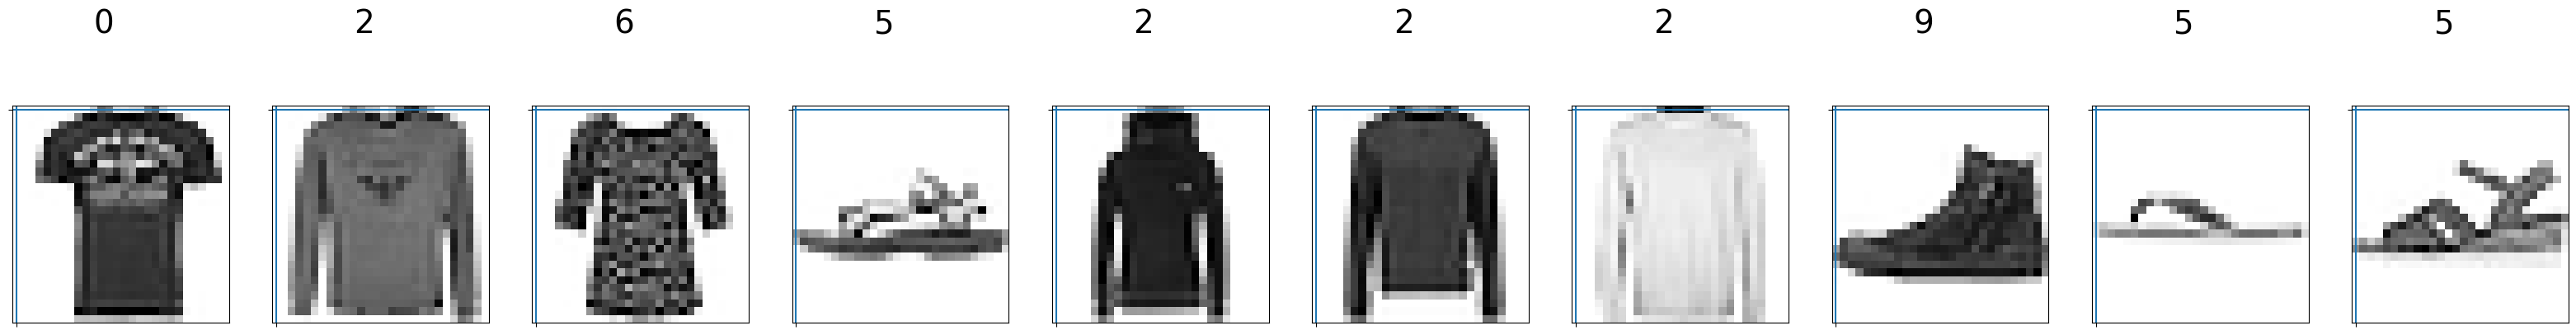

In [16]:
# Смотрим, что пришло
count = 0
sample_size = 10  # Сколько картинок будем смотреть
plt.figure(figsize=(40, 20))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count += 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i].item(), fontsize=28)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [17]:
# Сколько изображений в трейне и тесте
print(f'Количество изображений в тренировочном наборе: {len(y_train)}')
print(f'Количество изображений в тестовом наборе: {len(y_test)}')

Количество изображений в тренировочном наборе: 60000
Количество изображений в тестовом наборе: 10000


In [19]:
# Нарисуем, с чем мы имеем дело
im_number = 10
print(f"Изображение в виде массива:\n{X_train[im_number, :, :]}")

Изображение в виде массива:
tensor([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,   0,
           0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187, 149,
         135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221, 197,
         146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187, 190,
         188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168, 173,
         174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,   0,   0],
        [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184,
         178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0],
        [  0,   0,

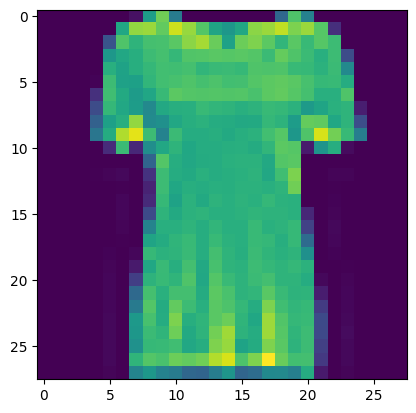

Метка класса: 0


In [20]:
# Визуализация изображения
plt.imshow(X_train[im_number, :, :])
plt.show()
print(f'Метка класса: {y_train[im_number]}')

In [21]:
# Преобразование данных в формат с увеличенной размерностью и перевод значений в float
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [22]:
# Определяем класс для нейронной сети
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(2, stride=2)
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(2, stride=2)
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        return x

In [23]:
# Создаем модель LeNet5
lenet5 = LeNet5()

In [24]:
# Определяем устройство (GPU или CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [26]:
# Функция потерь и оптимайзер
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [27]:
# Параметры для обучения
batch_size = 100
test_accuracy_history = []
test_loss_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

In [28]:
# Обучение модели
for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        preds = lenet5.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()

    train_loss_history.append(loss_value.data.cpu())
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    print(f"Эпоха {epoch} - точность на тестовых данных: {accuracy}")

Эпоха 0 - точность на тестовых данных: 0.8551999926567078
Эпоха 1 - точность на тестовых данных: 0.8629000186920166
Эпоха 2 - точность на тестовых данных: 0.8766000270843506
Эпоха 3 - точность на тестовых данных: 0.883400022983551
Эпоха 4 - точность на тестовых данных: 0.8899999856948853
Эпоха 5 - точность на тестовых данных: 0.8927000164985657
Эпоха 6 - точность на тестовых данных: 0.8898000121116638
Эпоха 7 - точность на тестовых данных: 0.8963000178337097
Эпоха 8 - точность на тестовых данных: 0.8971999883651733
Эпоха 9 - точность на тестовых данных: 0.8974000215530396
Эпоха 10 - точность на тестовых данных: 0.9010999798774719
Эпоха 11 - точность на тестовых данных: 0.9025999903678894
Эпоха 12 - точность на тестовых данных: 0.9050999879837036
Эпоха 13 - точность на тестовых данных: 0.9043999910354614
Эпоха 14 - точность на тестовых данных: 0.904699981212616
Эпоха 15 - точность на тестовых данных: 0.9043999910354614
Эпоха 16 - точность на тестовых данных: 0.9054999947547913
Эпоха 17 

*Сравнение результатов базовой настройки и полной тренировки модели.*

Полученные результаты представляют динамику обучения нейронной сети, где основными метриками являются потери (Loss) и точность (Accuracy).

Базовая загрузка и настройка датасета:

Loss: Это функция потерь, которая уменьшается на каждой эпохе. На первой эпохе значение потерь составляет 0.6273 и постепенно уменьшается до 0.2283 на десятой эпохе. Это свидетельствует о том, что модель постепенно улучшает свои прогнозы, минимизируя ошибку. Accuracy: Финальная точность составляет 89.14%, что означает, что модель правильно классифицирует около 89% тестовых данных.

Полная тренировка:

Точность на тестовых данных варьируется на протяжении всех 100 эпох. В начале обучения, точность стартует с 85.52% и постепенно увеличивается до 90.11% к 10-й эпохе. С дальнейшими эпохами наблюдается колебание точности, достигая макс значений около 90.6%, но, иногда снижаясь, что говорит о возможности переобучения или о сложности дальнейшего улучшения модели. В последних эпохах точность снижается, что может указывать на предел способности сети улучшать результаты с текущими параметрами.

<ipython-input-29-de97cc273f4a>:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


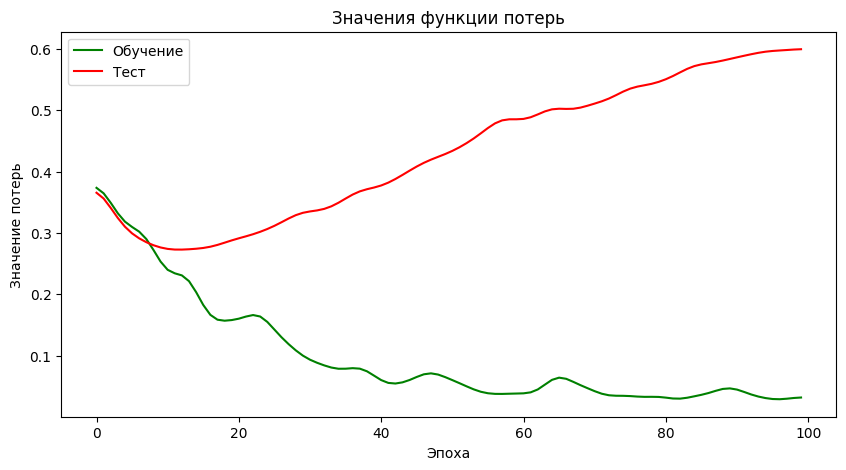

In [29]:
# Строим графики функций потерь
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Значения функции потерь', xlabel='Эпоха', ylabel='Значение потерь')
train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
ax.plot(train_loss_smoothed, color='green', label='Обучение')
test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
ax.plot(test_loss_smoothed, color='red', label='Тест')
ax.legend()
plt.show()

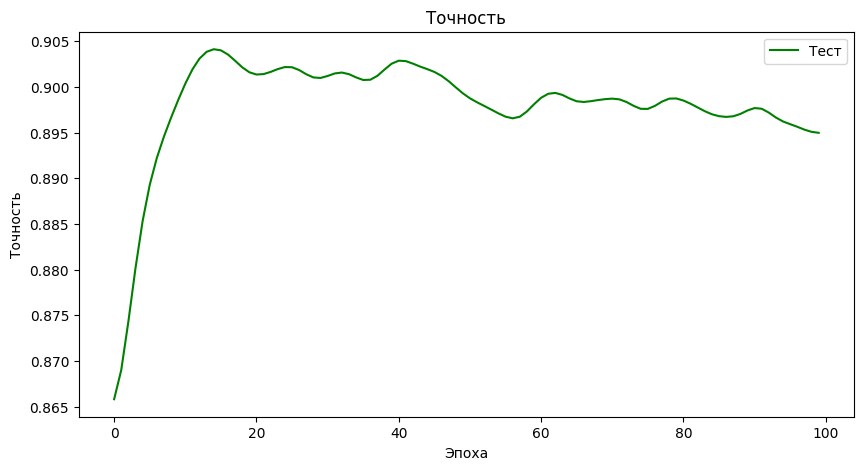

In [30]:
# График изменения точности на тестовых данных
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Точность', xlabel='Эпоха', ylabel='Точность')
test_accuracy_smoothed = gaussian_filter1d(test_accuracy_history, sigma=2)
ax.plot(test_accuracy_smoothed, color='green', label='Тест')
ax.legend()
plt.show()

In [31]:
# Импортируем библиотеки для оценки
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [32]:
# Функция для полной оценки модели
def full_evaluate_model(model, X_test, y_test, class_names):
    model.eval()  # Переводим модель в режим оценки
    with torch.no_grad():
        # Получаем предсказания на тестовом наборе
        test_preds = model(X_test)
        predicted_classes = test_preds.argmax(dim=1)

    # Рассчитываем точность
    accuracy = (predicted_classes == y_test).float().mean().data.cpu()
    print(f'Точность на тестовом наборе: {accuracy:.4f}')

    # Матрица ошибок
    cm = confusion_matrix(y_test.cpu(), predicted_classes.cpu())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

    # Отчет о классификации
    print("Отчет о классификации:")
    print(classification_report(y_test.cpu(), predicted_classes.cpu(), target_names=class_names))

Точность на тестовом наборе: 0.8983


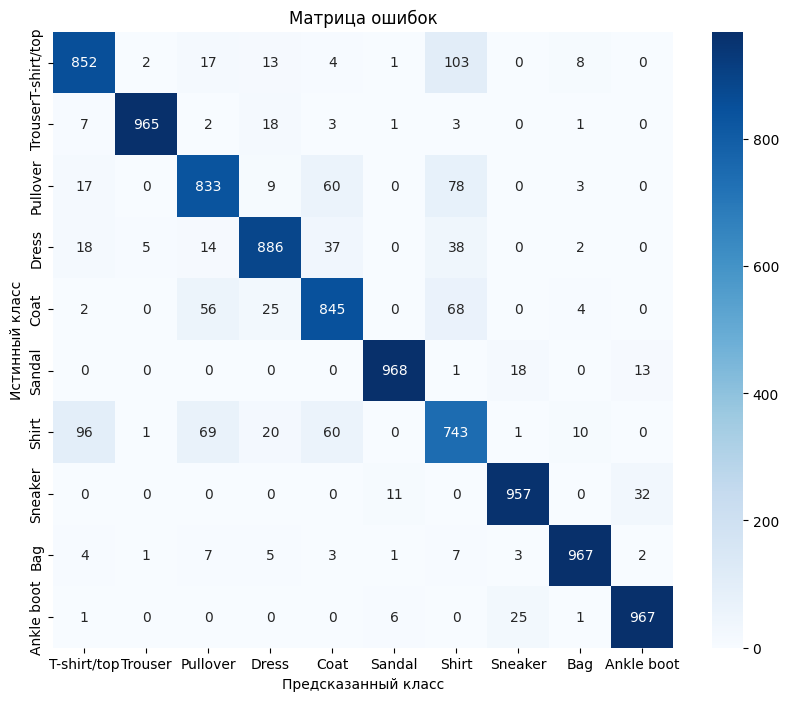

Отчет о классификации:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.83      0.83      0.83      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.83      0.84      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.71      0.74      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [33]:
# Классы для отображения из FashionMNIST
class_names = FashionMNIST_train.classes

# Вызов полной оценки
full_evaluate_model(lenet5, X_test, y_test, class_names)